# Classfication of news dataset

In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import matplotlib.pyplot as plt

shap.initjs()

### Load the 20 Categories dataset

In [2]:
import json
corpus, y = [], []
with open('News_Category_Dataset_v2.json') as f:
    for line in f:
        obj = json.loads(line)
        corpus.append(obj['headline'] + '. ' + obj['short_description'])
        y.append(obj['category'])
y = np.array(y)
print(len(corpus))
print(y.shape)
print(corpus[-1])
print(y[-1])


200853
(200853,)
Dwight Howard Rips Teammates After Magic Loss To Hornets. The five-time all-star center tore into his teammates Friday night after Orlando committed 23 turnovers en route to losing
SPORTS


TRAVEL: 9887
STYLE & BEAUTY: 9649
WELLNESS: 8935
PARENTING: 8677
WORLD NEWS: 8420
ENTERTAINMENT: 8129
HEALTHY LIVING: 6694
POLITICS: 6646
QUEER VOICES: 6314
FOOD & DRINK: 6226
BUSINESS: 5937
COMEDY: 5175
SPORTS: 4884
BLACK VOICES: 4528
HOME & LIVING: 4195
PARENTS: 3955
ARTS: 3878
WEDDINGS: 3651
WOMEN: 3490
IMPACT: 3459
DIVORCE: 3426
CRIME: 3405
MEDIA: 2815
WEIRD NEWS: 2670
GREEN: 2622
RELIGION: 2556
STYLE: 2254
SCIENCE: 2178
EDUCATION: 2148
TASTE: 2096
TECH: 2082
MONEY: 1707
FIFTY: 1401
GOOD NEWS: 1398
ENVIRONMENT: 1323
LATINO VOICES: 1129


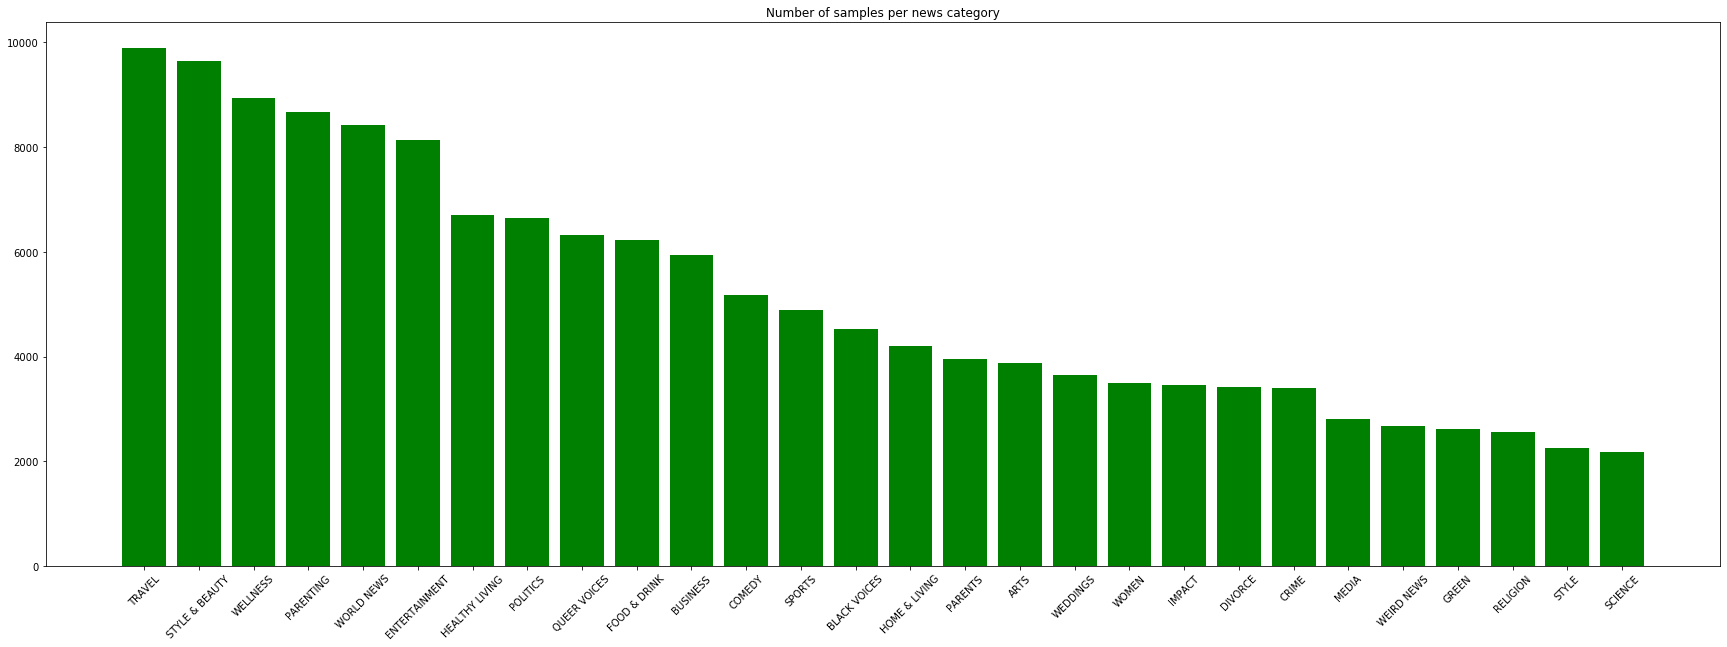

In [7]:
import collections
import random
count = collections.defaultdict(int)
article_length = collections.defaultdict(int)
corpus_new, y_new = [], [] 
for i, label in enumerate(y):
    if label == 'ARTS & CULTURE' or label == 'CULTURE & ARTS':
        label = 'ARTS'
    if label == 'COLLEGE':
        label = 'EDUCATION'
    if label == 'WORLDPOST' or label == 'THE WORLDPOST':
        label = 'WORLD NEWS'
    if label == 'POLITICS' and random.random() < 0.8:
        continue
    if label == 'WELLNESS' and random.random() < 0.5:
        continue
    if label == 'ENTERTAINMENT' and random.random() < 0.5:
        continue
    count[label] += 1
    article_length[label] += len(corpus[i])
    corpus_new.append(corpus[i])
    y_new.append(y[i])
    
keys, values, length = [], [], []
for k, v in sorted(count.items(), key=lambda x: x[1], reverse=True):
    print(f'{k}: {v}')
    if v <= 2148:
        continue
    keys.append(k)
    values.append(v)
    length.append(article_length[k]/v)
x_pos = list(range(len(keys)))

fig, ax = plt.subplots(figsize=(30,10))
plt.bar(x_pos, values, color='green')
plt.title("Number of samples per news category")

plt.xticks(x_pos, keys, rotation=45)
plt.show()

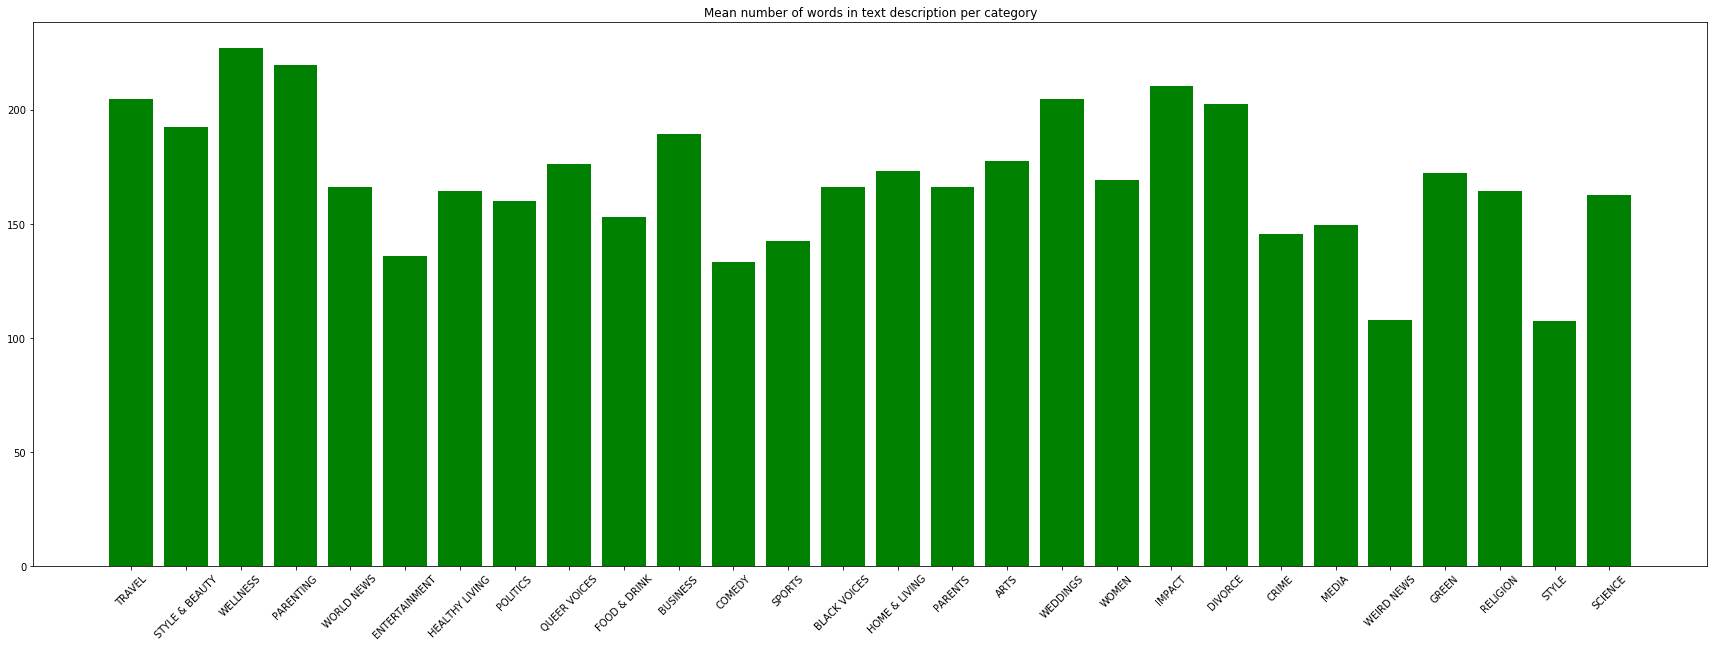

In [8]:
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(x_pos, length, color='green')
plt.title("Mean number of words in text description per category")
plt.xticks(x_pos, keys, rotation=45)

plt.show()

In [9]:
y_new = np.array(y_new)
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus_new, y_new, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
#vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (126351, 73572)
y_train.shape = (126351,)
X_test.shape = (31588, 73572)
y_test.shape = (31588,)


## Hyperparameter selection

RandomSearchCV

In [ ]:
# Grid search cross validation
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# grid = {"C":np.logspace(-3, 3, 7), "penalty":["l1", "l2"]}  # l1 lasso l2 ridge
# logreg = LogisticRegression(max_iter=100, random_state=42, multi_class='ovr')
# logreg_cv = GridSearchCV(logreg, grid, cv=10)
# logreg_cv.fit(X_train, y_train)

# print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
# print("accuracy :", logreg_cv.best_score_)

/home/brentweiliu/anaconda3/envs/my_notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)
# tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
# accuracy : 0.5674747330848193

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.5674747330848193


In [17]:
from sklearn.linear_model import LogisticRegression
multi_class = 'ovr'
#clf = LogisticRegression(solver='sag', max_iter=100, random_state=42, multi_class=multi_class).fit(X_train, y_train)
clf = LogisticRegression(solver='liblinear', penalty = 'l2', C = 0.1, max_iter=100, random_state=42, multi_class=multi_class).fit(X_train, y_train)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X_train, y_train), multi_class))
print("testing score : %.3f (%s)" % (clf.score(X_test, y_test), multi_class))

# CounterVectorizer()
# training score : 0.841 (ovr)
# testing score : 0.612 (ovr)

# CountVectorizer(stop_words='english', min_df=10)
# training score : 0.802 (ovr)
# testing score : 0.592 (ovr)

training score : 0.714 (ovr)
testing score : 0.570 (ovr)


In [18]:
import numpy as np
import seaborn as sn
from matplotlib.colors import LogNorm
y_true = y_test
y_pred = clf.predict(X_test)
labels={label:idx for idx, label in enumerate(list(set(y_test)))}
print(labels)
n = len(labels)
cm = np.zeros((n, n))

for t, p in zip(y_true, y_pred):
    i, j = labels[t], labels[p]
    cm[i, j] += 1
print(cm) 
print(cm.max())

{'BLACK VOICES': 0, 'SPORTS': 1, 'BUSINESS': 2, 'CULTURE & ARTS': 3, 'QUEER VOICES': 4, 'HEALTHY LIVING': 5, 'PARENTS': 6, 'THE WORLDPOST': 7, 'HOME & LIVING': 8, 'SCIENCE': 9, 'ARTS & CULTURE': 10, 'WEIRD NEWS': 11, 'WELLNESS': 12, 'WORLDPOST': 13, 'WOMEN': 14, 'STYLE & BEAUTY': 15, 'ARTS': 16, 'LATINO VOICES': 17, 'DIVORCE': 18, 'FIFTY': 19, 'TASTE': 20, 'RELIGION': 21, 'STYLE': 22, 'GOOD NEWS': 23, 'COMEDY': 24, 'MEDIA': 25, 'COLLEGE': 26, 'TRAVEL': 27, 'PARENTING': 28, 'EDUCATION': 29, 'POLITICS': 30, 'ENVIRONMENT': 31, 'GREEN': 32, 'MONEY': 33, 'IMPACT': 34, 'FOOD & DRINK': 35, 'TECH': 36, 'CRIME': 37, 'WEDDINGS': 38, 'ENTERTAINMENT': 39, 'WORLD NEWS': 40}
[[3.840e+02 2.500e+01 7.000e+00 ... 5.000e+00 1.320e+02 1.000e+00]
 [1.400e+01 6.890e+02 3.000e+00 ... 0.000e+00 4.700e+01 1.000e+00]
 [1.300e+01 1.500e+01 6.650e+02 ... 1.000e+00 3.600e+01 3.000e+00]
 ...
 [2.000e+00 4.000e+00 2.000e+00 ... 5.320e+02 2.100e+01 0.000e+00]
 [3.600e+01 2.100e+01 7.000e+00 ... 4.000e+00 1.174e+03 0

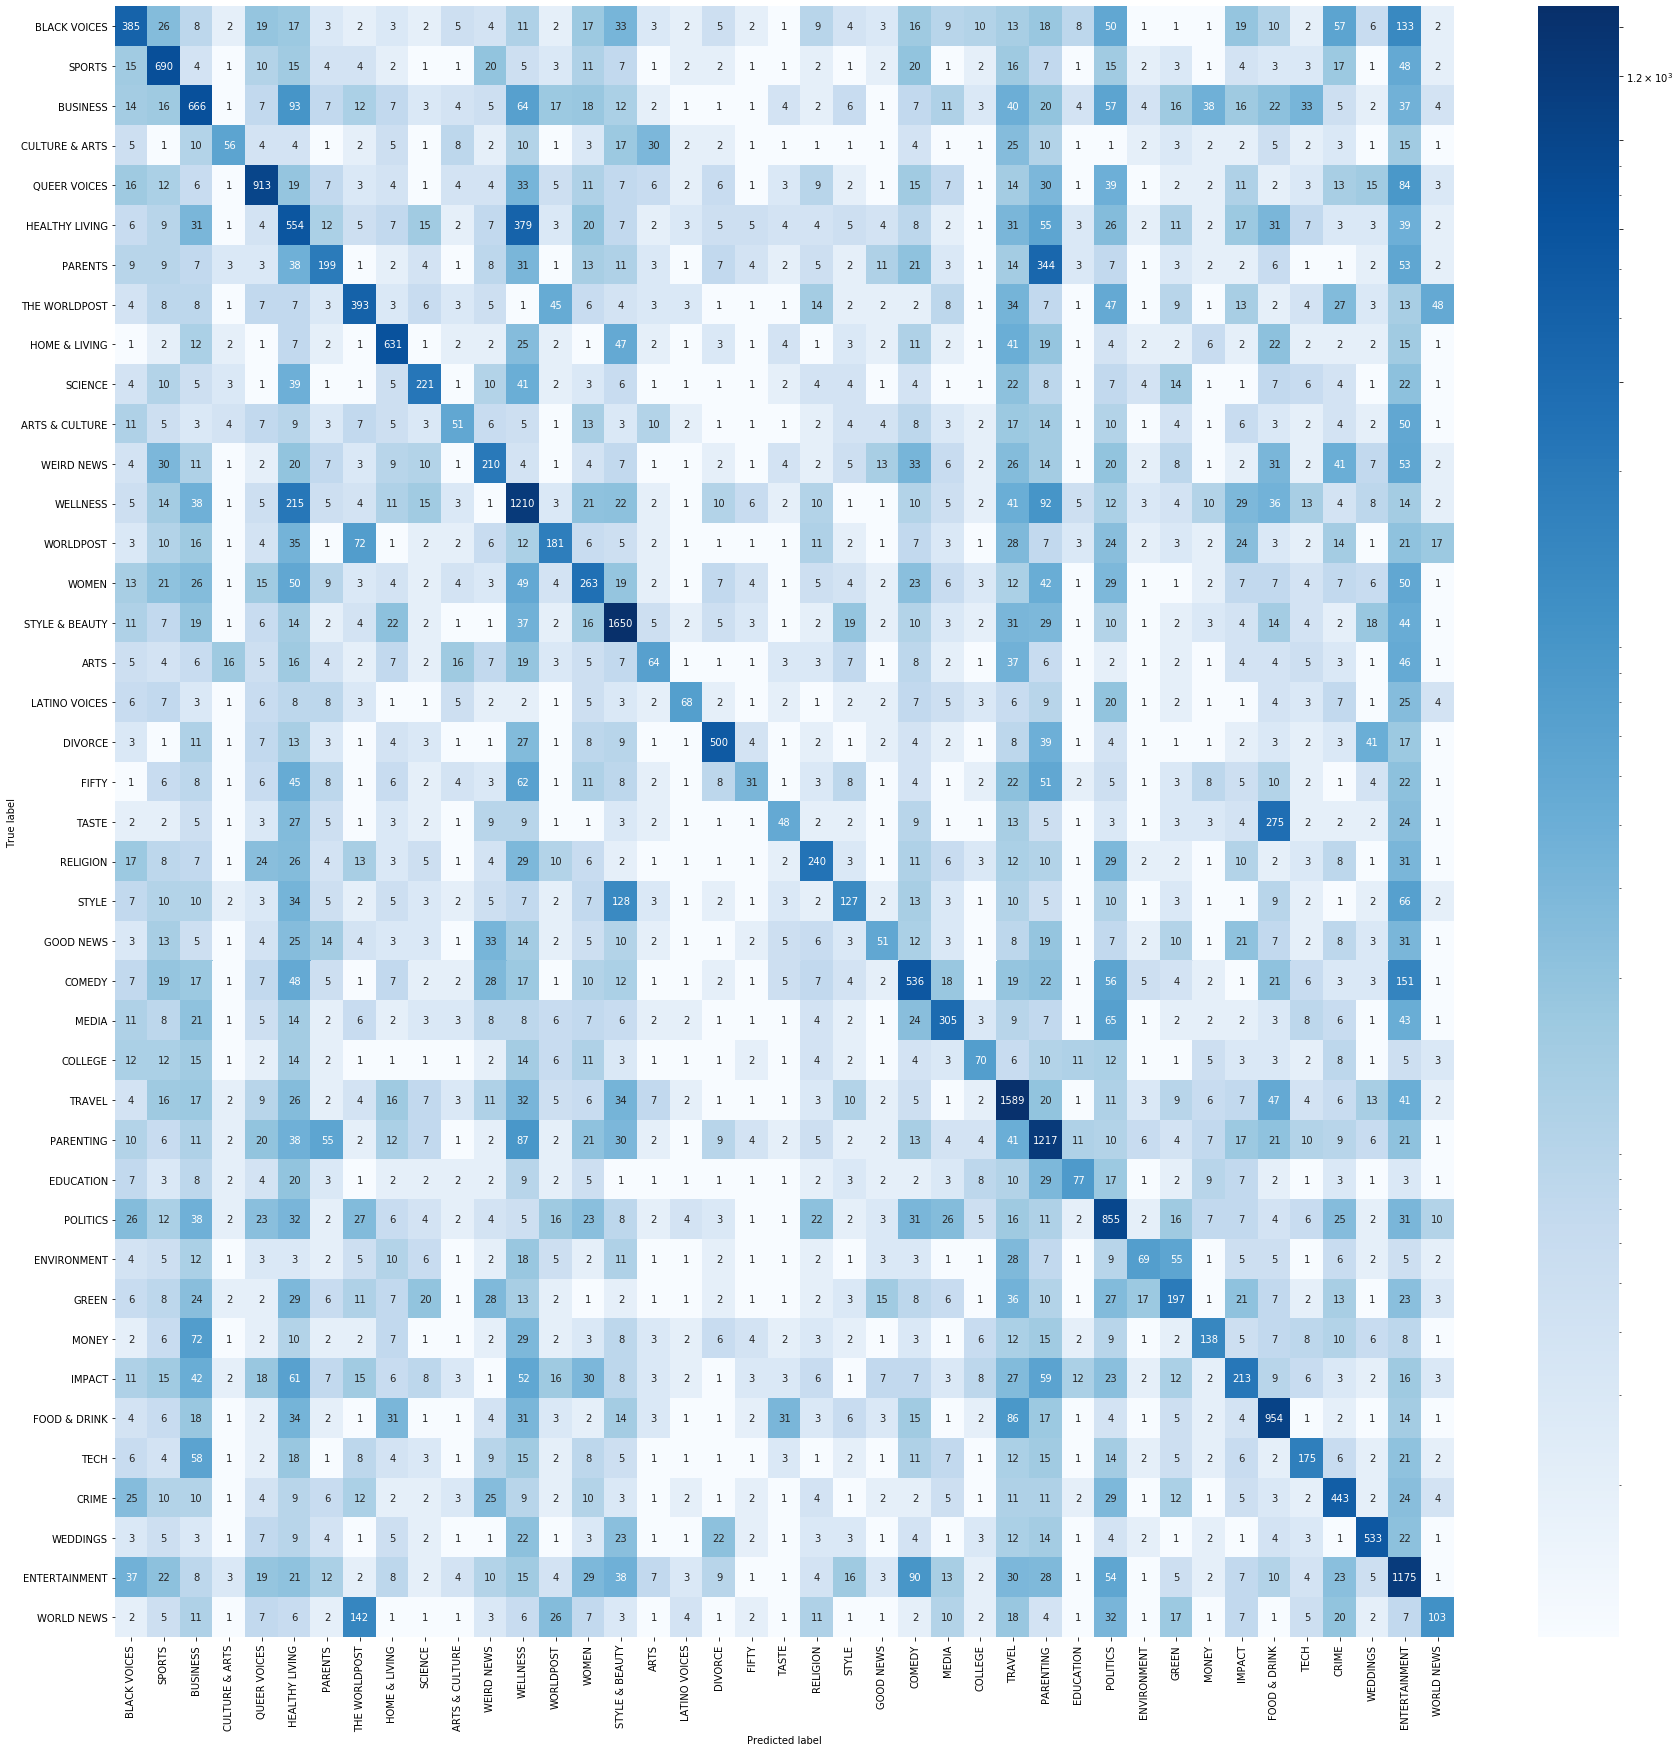

In [19]:
fig, ax = plt.subplots(figsize=(30,30))
cm += 1
heatmap = sn.heatmap(cm,  cmap="Blues", annot=True, fmt='g', norm=LogNorm(vmin=cm.min(), vmax=cm.max()),
                     xticklabels=labels.keys(), yticklabels=labels.keys(), ax=ax)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
y_pred = clf.predict(X_test)
labels=list(set(y_test))
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)
for i, label in enumerate(labels):
    (tn, fp), (fn, tp) = cm[i]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn) 
    print(f'{i}, {label},     \tprecision={precision:.3} recall={recall:.3} \n{cm[i]}')


0, BLACK VOICES,     	precision=0.56 recall=0.435 
[[30403   302]
 [  499   384]]
1, SPORTS,     	precision=0.661 recall=0.757 
[[30325   353]
 [  221   689]]
2, BUSINESS,     	precision=0.524 recall=0.535 
[[29742   604]
 [  577   665]]
3, CULTURE & ARTS,     	precision=0.625 recall=0.266 
[[31348    33]
 [  152    55]]
4, QUEER VOICES,     	precision=0.786 recall=0.714 
[[30061   249]
 [  366   912]]
5, HEALTHY LIVING,     	precision=0.329 recall=0.427 
[[29164  1128]
 [  743   553]]
6, PARENTS,     	precision=0.506 recall=0.247 
[[30595   193]
 [  602   198]]
7, THE WORLDPOST,     	precision=0.527 recall=0.551 
[[30525   352]
 [  319   392]]
8, HOME & LIVING,     	precision=0.751 recall=0.741 
[[30529   209]
 [  220   630]]
9, SCIENCE,     	precision=0.645 recall=0.509 
[[31035   121]
 [  212   220]]
10, ARTS & CULTURE,     	precision=0.439 recall=0.201 
[[31275    64]
 [  199    50]]
11, WEIRD NEWS,     	precision=0.455 recall=0.371 
[[30775   250]
 [  354   209]]
12, WELLNESS,    

# 单独优化 POLITICS,     	precision=0.525 recall=0.666 